In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# for interactivity
import ipywidgets
from ipywidgets import interact

from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

In [2]:
PATH = 'L:\crop\croprecommendation\crop_recommendation\crop_recommendation\dataset\Crop_recommendation.csv'
df = pd.read_csv(PATH)

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
#Returns the sum of all na values
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
df.shape


(2200, 8)

In [8]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
label_counts = df['label'].value_counts()
label_counts

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [11]:
unique_label_count = df['label'].nunique()
unique_label_count

22

In [12]:
rice_data = df[df['label'] == 'rice']
rice_data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
95,88,46,42,22.683191,83.463583,6.604993,194.265172,rice
96,93,47,37,21.533463,82.140041,6.500343,295.924880,rice
97,60,55,45,21.408658,83.329319,5.935745,287.576694,rice
98,78,35,44,26.543481,84.673536,7.072656,183.622266,rice


# **Descriptive Statistics**

In [13]:
#  check the Summary for all the crops

print("Average Ratio of Nitrogen in the Soil : {0:.2f}".format(df['N'].mean()))
print("Average Ratio of Phosphorous in the Soil : {0:.2f}".format(df['P'].mean()))
print("Average Ratio of Potassium in the Soil : {0:.2f}".format(df['K'].mean()))
print("Average Tempature in Celsius : {0:.2f}".format(df['temperature'].mean()))
print("Average Relative Humidity in % : {0:.2f}".format(df['humidity'].mean()))
print("Average PH Value of the soil : {0:.2f}".format(df['ph'].mean()))
print("Average Rainfall in mm : {0:.2f}".format(df['rainfall'].mean()))

Average Ratio of Nitrogen in the Soil : 50.55
Average Ratio of Phosphorous in the Soil : 53.36
Average Ratio of Potassium in the Soil : 48.15
Average Tempature in Celsius : 25.62
Average Relative Humidity in % : 71.48
Average PH Value of the soil : 6.47
Average Rainfall in mm : 103.46


In [14]:
# #  check the Summary Statistics for each of the Crops
# @interact
# def summary(crops = list(df['label'].value_counts().index)):
#     x = df[df['label'] == crops]
#     print("---------------------------------------------")
#     print("Statistics for Nitrogen")
#     print("Minimum Nitrigen required :", x['N'].min())
#     print("Average Nitrogen required :", x['N'].mean())
#     print("Maximum Nitrogen required :", x['N'].max())
#     print("---------------------------------------------")
#     print("Statistics for Phosphorous")
#     print("Minimum Phosphorous required :", x['P'].min())
#     print("Average Phosphorous required :", x['P'].mean())
#     print("Maximum Phosphorous required :", x['P'].max())
#     print("---------------------------------------------")
#     print("Statistics for Potassium")
#     print("Minimum Potassium required :", x['K'].min())
#     print("Average Potassium required :", x['K'].mean())
#     print("Maximum Potassium required :", x['K'].max())
#     print("---------------------------------------------")
#     print("Statistics for Temperature")
#     print("Minimum Temperature required : {0:.2f}".format(x['temperature'].min()))
#     print("Average Temperature required : {0:.2f}".format(x['temperature'].mean()))
#     print("Maximum Temperature required : {0:.2f}".format(x['temperature'].max()))
#     print("---------------------------------------------")
#     print("Statistics for Humidity")
#     print("Minimum Humidity required : {0:.2f}".format(x['humidity'].min()))
#     print("Average Humidity required : {0:.2f}".format(x['humidity'].mean()))
#     print("Maximum Humidity required : {0:.2f}".format(x['humidity'].max()))
#     print("---------------------------------------------")
#     print("Statistics for PH")
#     print("Minimum PH required : {0:.2f}".format(x['ph'].min()))
#     print("Average PH required : {0:.2f}".format(x['ph'].mean()))
#     print("Maximum PH required : {0:.2f}".format(x['ph'].max()))
#     print("---------------------------------------------")
#     print("Statistics for Rainfall")
#     print("Minimum Rainfall required : {0:.2f}".format(x['rainfall'].min()))
#     print("Average Rainfall required : {0:.2f}".format(x['rainfall'].mean()))
#     print("Maximum Rainfall required : {0:.2f}".format(x['rainfall'].max()))

In [15]:
print("Crops which requires very High Ratio of Nitrogen Content in Soil:", df[df['N'] > 120]['label'].unique())
print("Crops which requires very High Ratio of Phosphorous Content in Soil:", df[df['P'] > 100]['label'].unique())
print("Crops which requires very High Ratio of Potassium Content in Soil:", df[df['K'] > 200]['label'].unique())
print("Crops which requires very High Rainfall:", df[df['rainfall'] > 200]['label'].unique())
print("Crops which requires very Low Temperature :", df[df['temperature'] < 10]['label'].unique())
print("Crops which requires very High Temperature :", df[df['temperature'] > 40]['label'].unique())
print("Crops which requires very Low Humidity:", df[df['humidity'] < 20]['label'].unique())
print("Crops which requires very Low pH:", df[df['ph'] < 4]['label'].unique())
print("Crops which requires very High pH:", df[df['ph'] > 9]['label'].unique())

Crops which requires very High Ratio of Nitrogen Content in Soil: ['cotton']
Crops which requires very High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops which requires very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops which requires very High Rainfall: ['rice' 'papaya' 'coconut']
Crops which requires very Low Temperature : ['grapes']
Crops which requires very High Temperature : ['grapes' 'papaya']
Crops which requires very Low Humidity: ['chickpea' 'kidneybeans']
Crops which requires very Low pH: ['mothbeans']
Crops which requires very High pH: ['mothbeans']


# **Separating Features and Target values**

In [16]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [17]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [18]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# **Decision Tree**

In [19]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

report = classification_report(Ytest,predicted_values,zero_division=1)
print(report)

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       1.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [20]:
# Precision indicates how many of the model's predicted instances for a particular crop are correct.
# Recall tells how many of the actual instances of a particular crop were correctly predicted.
# The F1-score is the harmonic mean of precision and recall, providing a balanced measure of both.
# Support is the number of actual occurrences of each class (crop type) in the test set.

In [21]:
# Macro average: A simple average of precision, recall, and F1-score across all crop types.
# Weighted average: This takes into account the number of instances (support) for each crop class.

In [22]:
from sklearn.model_selection import cross_val_score
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [23]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

# **Guassian Naive Bayes**

In [24]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [25]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

# **Random Forest**

In [26]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Random Forest')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [27]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

# **K NEAREST NEIGHBOUR**

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(Xtrain, Ytrain)

# Predict values for the test set
predicted_values_knn = knn.predict(Xtest)

# Calculate the accuracy
x = accuracy_score(Ytest, predicted_values_knn)

# Only append if 'KNN' is not already in the list
if 'KNN' not in model:
    model.append('KNN')
acc.append(x)

# Print accuracy
print("KNN's Accuracy is: ", x * 100)

# Generate and print the classification report
report_knn = classification_report(Ytest, predicted_values_knn, zero_division=1)
print(report_knn)


KNN's Accuracy is:  97.5
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.89      0.86      0.87        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
  

In [29]:
# Cross validation score (Random Forest)
score = cross_val_score(knn,features,target,cv=5)
score

array([0.97727273, 0.98181818, 0.97954545, 0.97954545, 0.97954545])

C:\Users\lhona\AppData\Local\Temp\ipykernel_8764\2464031616.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = acc,y = model,palette='dark')


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

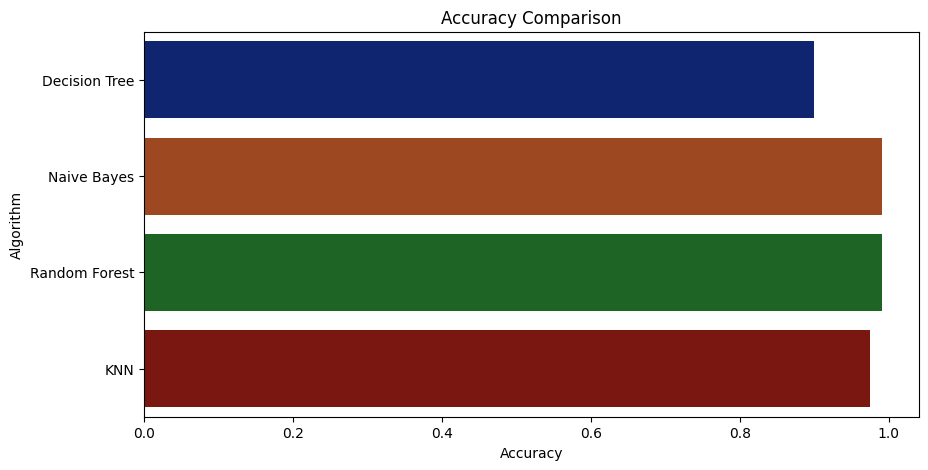

In [30]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [31]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9
Naive Bayes --> 0.990909090909091
Random Forest --> 0.990909090909091
KNN --> 0.975


# **Predicting using Random Forest**

In [32]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


c:\Users\lhona\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [33]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = NaiveBayes.predict(data)
print(prediction)

['jute']


c:\Users\lhona\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# **Save as Pickle file**

In [34]:
import pickle
# Dump the trained RN classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

In [35]:
from google.colab import files
files.download('RandomForest.pkl')


ModuleNotFoundError: No module named 'google'